<a href="https://colab.research.google.com/github/aaronstone1699/red-lesion-classifier/blob/master/red_lesions_model_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
import datetime
import time
import math as m


In [0]:
%load_ext tensorboard

# *DATASET* preparation

In [0]:
#dataset preparartion class to make it easier to load the data
class DataSet:
    
    def __init__(me,location,categories,resize=True,lheight=500,lwidth=500,grayscale=True,shuffled=False,apply=None,count=1000):
        me.categories=categories
        me.datadir=location
        me.lheight=lheight
        me.lwidth=lwidth
        me.grayscale=grayscale
        me.shuffled=shuffled
        me.apply=apply
        me.count=count
        me.dataset=me.create_traindata()
        if resize==True:
            me.dataset=me.resizeIt(me.dataset)
        
        
    
    def resizeIt(me,traindata_array):
        resized_traindata=[]
        resized_traindata_temp=[]
        for img in traindata_array[0]:
            
            new_image_array=cv2.resize(img,(me.lheight,me.lwidth))
            resized_traindata_temp.append(np.array(new_image_array))
        array=[np.array(resized_traindata_temp),np.array(traindata_array[1])]
        return(array)

    def create_traindata(me):
        traindata=[]
        for cats in me.categories:
            n=0
            path=os.path.join(me.datadir,cats)
            class_num=me.categories.index(cats)
            for img in os.listdir(path):
                if(me.grayscale==True):
                    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                    if(me.apply=='sobel'):
                        img_array=cv2.Sobel(img_array,cv2.CV_64F,1,0,ksize=5)
                    n=n+1
                    print(str(n)+" images loaded successfully",end='')
                    if n>=me.count:
                      break
                else:
                    img_array=cv2.imread(os.path.join(path,img))
                    n=n+1
                    print(str(n)+" images loaded successfully",end='')
                    if n>=me.count:
                      break
                traindata.append([img_array,class_num])
            print(len(traindata))
            print()
            
        if(me.shuffled==True):
          random.shuffle(traindata)
          print("shuffled")
        traindata_img=[]
        traindata_lab=[]
        for sets in traindata:
            traindata_img.append(sets[0])
            traindata_lab.append(sets[1])
        traindata=[traindata_img,traindata_lab]
        return(traindata)
    
    
    def save(me,traindata,location_names):
        feature_set=[]
        label_set=[]
        for features,labels in traindata:
            feature_set.append(features)
            label_set.append(labels)
            
        x=np.array(x).reshape(-1,me.lwidth,me.lheight,1)

        pickle_out=open(location_names[0]+'.pickle','wb')
        pickle.dump(feature_set,pickle_out)
        pickle_out.close()
        pickle_out=open(location_names[1]+'.pickle','wb')
        pickle.dump(label_set,pickle_out)
        pickle_out.close()


In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Training Phase**

In [0]:


#path of the folder containing subfolder with images
path="//content//drive//My Drive//lesions"

#names of the subfolders
class_names=['lesions_1','normal_1']

#function to load the dataset into the variable dataset
dataset=DataSet(path,categories=class_names,lheight=320,lwidth=320,grayscale=False,apply=None,count=4000,shuffled=True)


#data contains the numpy image array
data=dataset.dataset
#this returns a shuffled numpy array with the format [[images][labels]] to data

1 images loaded successfully2 images loaded successfully3 images loaded successfully4 images loaded successfully5 images loaded successfully6 images loaded successfully7 images loaded successfully8 images loaded successfully9 images loaded successfully10 images loaded successfully11 images loaded successfully12 images loaded successfully13 images loaded successfully14 images loaded successfully15 images loaded successfully16 images loaded successfully17 images loaded successfully18 images loaded successfully19 images loaded successfully20 images loaded successfully21 images loaded successfully22 images loaded successfully23 images loaded successfully24 images loaded successfully25 images loaded successfully26 images loaded successfully27 images loaded successfully28 images loaded successfully29 images loaded successfully30 images loaded successfully31 images loaded successfully32 images loaded successfully33 images loaded successfully34 images loaded successfully35 images loaded succes

In [0]:
print(type(dataset))
print(len(data))
print(len(data[1]))
print(data[0].shape)
print(data[0])
print(len(data[1][:20]))

In [0]:
x=len(data[0])
test_sample_size=int(0.2*x)
train_sample_size=x-test_sample_size

#splitting the data into training set and test set,with test_sample_size being the percentage of total dataset for test set
(tr_img,tr_lab),(te_img,te_lab)=(data[0][:train_sample_size],data[1][:train_sample_size]),(data[0][train_sample_size:],data[1][train_sample_size:])

In [0]:
print(tr_img.shape)
print(tr_lab.shape)
print(te_img.shape)
print(te_lab.shape)
print(tr_lab)
print(te_lab)

In [0]:
#defining our model ,the description of the model is provided separately
lesion_Classifier=Sequential()
lesion_Classifier.add(Convolution2D(8,(3,3),input_shape=(320,320,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(16,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(32,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(64,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(128,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Convolution2D(256,(3,3),activation='relu'))
lesion_Classifier.add(MaxPooling2D(pool_size=(2,2)))
lesion_Classifier.add(Flatten())
lesion_Classifier.add(Dense(512,activation='relu'))
lesion_Classifier.add(Dense(256,activation='relu'))
lesion_Classifier.add(Dense(128,activation='relu'))
lesion_Classifier.add(Dense(1,activation='sigmoid'))

In [0]:
lesion_Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
#create a tensorboard callback for our model's training,with log dir being the location of the logs
log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#name for the tensorboard logs
name="images_ewith-sn-1".format(int(time.time()))

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [0]:
 #training the model for 25 epochs with a validation set ,10% of the training set,and mapping the progress to tensorboard
lesion_Classifier.fit(tr_img,tr_lab,epochs=100,validation_split=0.1,callbacks=[tensorboard_callback,es])

Epoch 1/100
75/75 [==============================] - 8s 106ms/step - loss: 0.4417 - accuracy: 0.9030 - val_loss: 0.0801 - val_accuracy: 0.9735
Epoch 2/100
75/75 [==============================] - 8s 103ms/step - loss: 0.0767 - accuracy: 0.9793 - val_loss: 0.0440 - val_accuracy: 0.9886
Epoch 3/100
75/75 [==============================] - 8s 102ms/step - loss: 0.0445 - accuracy: 0.9899 - val_loss: 0.0436 - val_accuracy: 0.9962
Epoch 4/100
75/75 [==============================] - 8s 102ms/step - loss: 0.0316 - accuracy: 0.9911 - val_loss: 0.0718 - val_accuracy: 0.9924
Epoch 5/100
75/75 [==============================] - 8s 103ms/step - loss: 0.0527 - accuracy: 0.9848 - val_loss: 0.0593 - val_accuracy: 0.9962
Epoch 6/100
75/75 [==============================] - 8s 103ms/step - loss: 0.0276 - accuracy: 0.9937 - val_loss: 0.0178 - val_accuracy: 0.9886
Epoch 7/100
75/75 [==============================] - 8s 103ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0238 - val_accuracy: 0.9962

In [0]:
#saving the weights to h5 format
lesion_Classifier.save("model_2.3f.h5")

In [0]:
print(lesion_Classifier.summary())

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_254 (Conv2D)          (None, 318, 318, 8)       224       
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 159, 159, 8)       0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 157, 157, 16)      1168      
_________________________________________________________________
max_pooling2d_178 (MaxPoolin (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 76, 76, 32)        4640      
_________________________________________________________________
max_pooling2d_179 (MaxPoolin (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_257 (Conv2D)          (None, 36, 36, 64)      

In [0]:
#the prediction of all the images in the test set 'te_img' using the trained CNN
y_pred=lesion_Classifier.predict_classes(te_img)

#the confusion matrix based on the prediction in y_preds and the true labels stored in the 'te_lab'
con_mat = tf.math.confusion_matrix(labels=te_lab, predictions=y_pred)


In [0]:
#to manually check the predictions 
for i in range(len(y_pred)):
  print(y_pred[i])
  plt.imshow(cv2.cvtColor(te_img[i], cv2.COLOR_BGR2RGB))
  plt.show()

In [0]:
from google.colab import files

In [0]:
# command to convert the tensorboard logs to zip file for downloading 
!zip -r /content/logs.zip /content/logs

updating: content/logs/ (stored 0%)
updating: content/logs/fit/ (stored 0%)
updating: content/logs/fit/20200524-080506/ (stored 0%)
updating: content/logs/fit/20200524-080506/train/ (stored 0%)
updating: content/logs/fit/20200524-080506/train/events.out.tfevents.1590307508.1c6e84e9740d.138.44160.v2 (deflated 88%)
updating: content/logs/fit/20200524-080506/train/plugins/ (stored 0%)
updating: content/logs/fit/20200524-080506/train/plugins/profile/ (stored 0%)
updating: content/logs/fit/20200524-080506/train/plugins/profile/2020_05_24_08_05_09/ (stored 0%)
updating: content/logs/fit/20200524-080506/train/plugins/profile/2020_05_24_08_05_09/1c6e84e9740d.trace.json.gz (deflated 0%)
updating: content/logs/fit/20200524-080506/train/plugins/profile/2020_05_24_08_05_09/1c6e84e9740d.overview_page.pb (deflated 58%)
updating: content/logs/fit/20200524-080506/train/plugins/profile/2020_05_24_08_05_09/1c6e84e9740d.input_pipeline.pb (deflated 57%)
updating: content/logs/fit/20200524-080506/train/plu

In [0]:
#download the tensorboard logs
files.download('logs.zip')

[[235   6]
 [  1 417]]


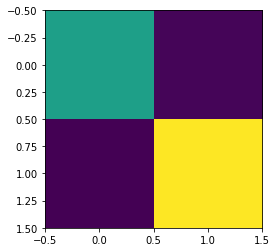

In [0]:
#con is the confusion matrix in numpy array format
con=con_mat.numpy()

print(con)
#visualize the confusion matrix 
plt.imshow(con)
plt.show()

In [0]:
#accuracy measurement matrics for the test set using the confusion matrix 'con'
fn=con[0][1]
tn=con[1][1]
tp=con[0][0]
fp=con[1][0]
sen=tp/(tp+fn)
spe=tn/(tn+fp)
jac=tp/(tp+fp+fn)
dice=(2*tp)/((2*tp)+fp+fn)
acc=(tp+tn)/(tp+fn+tn+fp)
mcc=((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in int_scalars
  # This is added back by InteractiveShellApp.init_path()


In [0]:
print(fn,'fn')
print(tn,'tn')
print(fp,'fp')
print(tp,'tp')
print(sen,'sen')
print(spe,'spe')
print(jac,'jac')
print(dice,'dice')
print(acc,'acc')
print(mcc,'mcc')


NameError: ignored

1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
0   -   0
1   -   1
0   -   0
 /  0   -   1


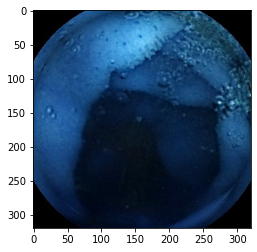

1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
 /  1   -   0


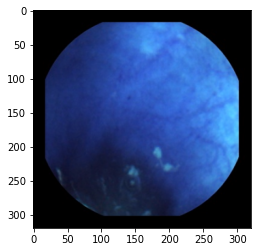

1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0


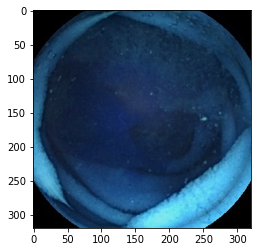

1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1


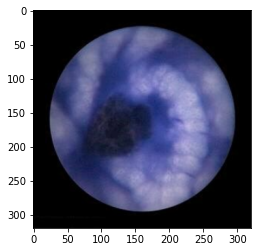

 /  0   -   1


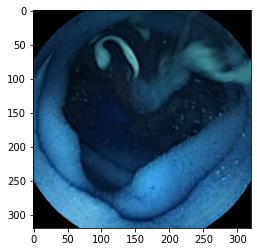

0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
 /  0   -   1


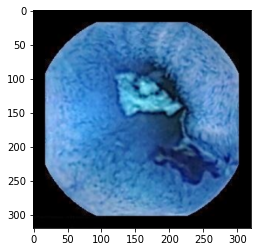

1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
 /  0   -   1


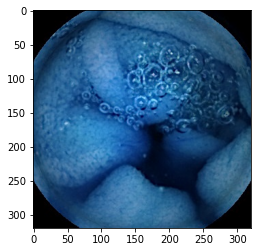

1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
0   -   0
1   -   1
1   -   1
1   -   1
0   -   0
0   -   0
1   -   1
0   -   0
1   -   1


In [0]:
n=0
#0=lesion ,1=normal
for i in range(len(te_lab)):
    if(te_lab[i]==y_pred[i][0]):
      #checking if the predicted label and the true label is the same
        n=n+1
        print(te_lab[i],'  -  ',y_pred[i][0])

        
    else:
      #plotting the images which are falsely identified by our model
        print(' / ',te_lab[i],'  -  ',y_pred[i][0])
        plt.imshow(te_img[i],'gray')
        plt.show()
print((n/len(te_lab))*100)    

# **Testing phase**


In [0]:
#model location is the path where the weights are saved
model_location="model_2.3f.h5"

#used to load the weights if classifying at a different time
lesion_Classifier.load_weights(model_location)

In [0]:
#loading the testing dataset from th eunlables SET 2


#path of the folder containing subfolder with images
path_test="//content//drive//My Drive//lesions//red lesions dataset"

#names of the subfolders
class_names=['Set 2']

#function to load the dataset into the variable dataset
dataset_test=DataSet(path_test,categories=class_names,lheight=320,lwidth=320,grayscale=False,apply=None,count=4000)


#data contains the numpy image array
data_test=dataset_test.dataset
#this returns a shuffled numpy array with the format [[images][labels]] to data

1 images loaded successfully2 images loaded successfully3 images loaded successfully4 images loaded successfully5 images loaded successfully6 images loaded successfully7 images loaded successfully8 images loaded successfully9 images loaded successfully10 images loaded successfully11 images loaded successfully12 images loaded successfully13 images loaded successfully14 images loaded successfully15 images loaded successfully16 images loaded successfully17 images loaded successfully18 images loaded successfully19 images loaded successfully20 images loaded successfully21 images loaded successfully22 images loaded successfully23 images loaded successfully24 images loaded successfully25 images loaded successfully26 images loaded successfully27 images loaded successfully28 images loaded successfully29 images loaded successfully30 images loaded successfully31 images loaded successfully32 images loaded successfully33 images loaded successfully34 images loaded successfully35 images loaded succes

In [0]:
test_images=data_test[0]
#test_images contain the images of dim 320*320*3 in Set 2

In [0]:
test_pred=lesion_Classifier.predict_classes(test_images)
#the predictions for each image in test_images according to our model

In [0]:
#finding the results of the classification of Set 2 images
results={'lesion':[],'normal':[]}
for preds_index in range(len(test_pred)):
  image=test_images[preds_index]
  if(test_pred[preds_index][0]==0):
    #print('lesion')
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    results['lesion'].append(image)
  else:
    results['normal'].append(image)
    #print('normal')
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #plt.show()

In [0]:
print( 'lesions : {}'.format(len(results['lesion'])))
print( 'normal : {}'.format(len(results['normal'])))
#showing the results of the Set 2 frames


lesions : 325
normal : 275


In [0]:
prediction_array=[]
index=[]
num=1
for image in test_images:
  image=image.reshape(-1,320,320,3)
  prediction_array.append(lesion_Classifier.predict_proba(image)[0][0])
  index.append(num)
  num=num+1


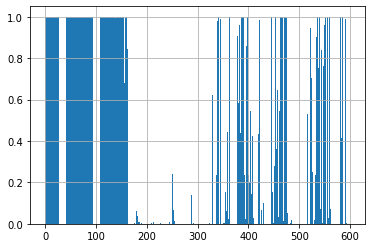

In [0]:
x = np.arange(600)
plt.bar(x,prediction_array)
plt.grid()